# Explore data
The `data\` folder included in this project originates from the Wang et al 2024 article. It's preprocessed data from four different sources. The purpose of this notebook is exploring and displaying this data.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import scienceplots
import pandas as pd
import numpy as np
import sys
import os

style.use('ggplot')

## Plotting the HUST dataset

In [8]:
DATA_FOLDER = "data/HUST data"
FILES = os.listdir(path=DATA_FOLDER)

def pd_from_file(index:int, folder:str="data/HUST data"):
    files = os.listdir(path=folder)
    try:
        file = os.path.join(folder, files[index])
    except:
        print("Out of range!")
        return None
    print(f"FILE NAME: '{file}'")
    return pd.read_csv(file)


def plot_some_data(cell_data: pd.DataFrame):
    # plot
    x, volt_mean, capacity_ah = cell_data.index, cell_data["voltage mean"], cell_data["capacity"]
    volt_kurt, curr_mean = cell_data["voltage kurtosis"], cell_data["current mean"]

    fig, ax = plt.subplots(2,2,figsize=(10,7))

    ax[0,0].plot(x, volt_mean, c='blue')
    ax[0,1].plot(x, 100*capacity_ah/capacity_ah[0], c='blue')
    ax[1,0].plot(x, volt_kurt, c='blue')
    ax[1,1].plot(x, curr_mean, c='blue')

    ax[0,0].set_ylabel('Mean voltage (V)')
    ax[0,1].set_ylabel('Capacity (%)')
    ax[1,0].set_ylabel('Voltage kurtosis')
    ax[1,1].set_ylabel('Mean current')
    ax[1,0].set_xlabel('Cycle')
    ax[1,1].set_xlabel('Cycle')
    plt.show()

    

77
FILE NAME: 'data/HUST data/8-7.csv'


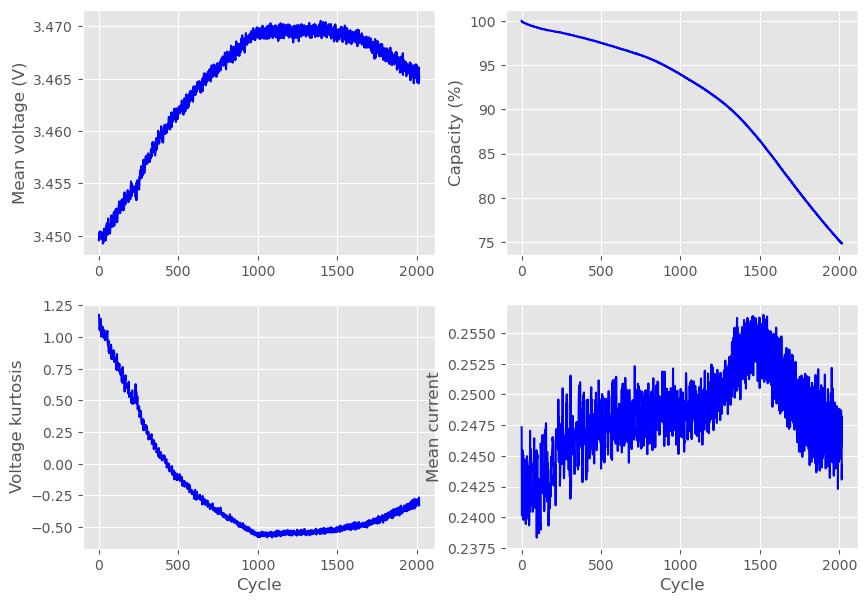

In [9]:
# a small demonstration
print(len(FILES))
index = 10
batt_data = pd_from_file(index)
plot_some_data(batt_data)

## Comparing datasets.

In [17]:
hust_example = pd_from_file(index=0, folder="data/HUST data")
mit_example  = pd_from_file(index=0, folder="data/MIT data/2017-06-30")
tju_example  = pd_from_file(index=0, folder="data/TJU data/Dataset_1_NCA_battery")
xtju_example = pd_from_file(index=0, folder="data/XJTU data")

ds_names = ["hust", "mit", "tju", "xtju"]
datasets = [hust_example, mit_example, tju_example, xtju_example]

FILE NAME: 'data/HUST data/10-2.csv'
FILE NAME: 'data/MIT data/2017-06-30/2017-06-30_battery-42.csv'
FILE NAME: 'data/TJU data/Dataset_1_NCA_battery/CY25-05_1-#2.csv'
FILE NAME: 'data/XJTU data/R3_battery-5.csv'


In [18]:
for ds, name in zip(datasets, ds_names):
    print(name)
    print(ds.columns)

hust
Index(['voltage mean', 'voltage std', 'voltage kurtosis', 'voltage skewness',
       'CC Q', 'CC charge time', 'voltage slope', 'voltage entropy',
       'current mean', 'current std', 'current kurtosis', 'current skewness',
       'CV Q', 'CV charge time', 'current slope', 'current entropy',
       'capacity'],
      dtype='object')
mit
Index(['voltage mean', 'voltage std', 'voltage kurtosis', 'voltage skewness',
       'CC Q', 'CC charge time', 'voltage slope', 'voltage entropy',
       'current mean', 'current std', 'current kurtosis', 'current skewness',
       'CV Q', 'CV charge time', 'current slope', 'current entropy',
       'capacity'],
      dtype='object')
tju
Index(['voltage mean', 'voltage std', 'voltage kurtosis', 'voltage skewness',
       'CC Q', 'CC charge time', 'voltage slope', 'voltage entropy',
       'current mean', 'current std', 'current kurtosis', 'current skewness',
       'CV Q', 'CV charge time', 'current slope', 'current entropy',
       'capacity'],
 